<a href="https://colab.research.google.com/github/geethasrisykam/Traffic_Detection/blob/main/TRAFFIC_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [4]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from PIL import Image 
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [5]:
data = [] 
labels = [] 
classes = 43 
cur_path = os.getcwd()

for i in range(classes): 
  path = os.path.join(cur_path, 'train', str(i))
  images = os.listdir(path)

  for a in images: 
    try: 
      image = Image.open (path+'/'+a)
      image = image.resize((30,30))
      image = np.array(image)
      data.append(image)
      labels.append (i)
    except: 
      print("Error loading image")
data = np.array(data)
labels = np.array(labels) 

In [6]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [16]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.35, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25485, 30, 30, 3) (13724, 30, 30, 3) (25485,) (13724,)


In [17]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [18]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [19]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

In [20]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

In [21]:
model.add(Conv2D(filters=32, kernel_size=(2, 2), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(2, 2), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

In [22]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
797/797 [==============================] - 87s 107ms/step - loss: 3.5912 - accuracy: 0.1077 - val_loss: 1.6937 - val_accuracy: 0.4576
Epoch 2/15
797/797 [==============================] - 84s 106ms/step - loss: 1.7945 - accuracy: 0.4438 - val_loss: 0.8617 - val_accuracy: 0.7410
Epoch 3/15
797/797 [==============================] - 85s 106ms/step - loss: 1.1708 - accuracy: 0.6343 - val_loss: 0.4252 - val_accuracy: 0.8736
Epoch 4/15
797/797 [==============================] - 85s 107ms/step - loss: 0.8149 - accuracy: 0.7416 - val_loss: 0.2628 - val_accuracy: 0.9322
Epoch 5/15
797/797 [==============================] - 87s 109ms/step - loss: 0.5976 - accuracy: 0.8178 - val_loss: 0.2283 - val_accuracy: 0.9345
Epoch 6/15
797/797 [==============================] - 85s 107ms/step - loss: 0.4782 - accuracy: 0.8549 - val_loss: 0.1570 - val_accuracy: 0.9574
Epoch 7/15
797/797 [==============================] - 85s 107ms/step - loss: 0.4199 - accuracy: 0.8770 - val_loss: 0.1278 - val_ac

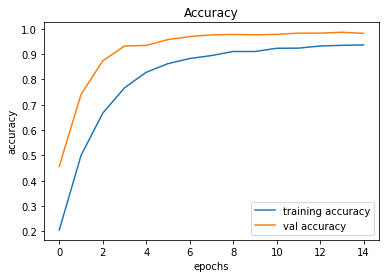

In [25]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

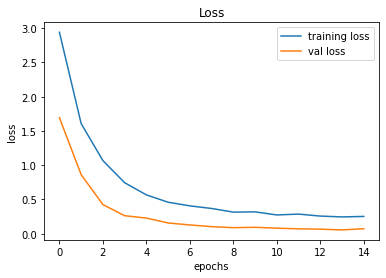

In [26]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

#pred = model.predict_classes(X_test)
pred = np.argmax(model.predict(X_test), axis=-1)
print(pred)

[16  1 38 ... 13  7 10]


In [28]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9517814726840855


In [32]:
model.save('traffic_detector.h5')